In [1]:
%matplotlib inline
# %matplotlib

In [2]:
import time

In [3]:
from __future__ import division,print_function

In [4]:
from spartan.utils.sklearn import model_assessment, feature_selection
from spartan.utils.sklearn import pandas_helpers

In [5]:
from collections import Counter, defaultdict
import math

import numpy as np
import pandas as pd
import sklearn as skl
import sklearn.preprocessing as ppro

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.decomposition import PCA, RandomizedPCA, KernelPCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.grid_search import GridSearchCV

from sklearn.cross_validation import train_test_split

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.linear_model import Lasso

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, univariate_selection
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import confusion_matrix



In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
sns.set_context('poster')

In [8]:
gus_processed_path = '/home/gus/MEGAsync/zim/main/BCH/Projects/Jodie_and_James/labeled_data_gus.csv'
gus_processed_data = pd.read_csv(gus_processed_path)
gus_processed_data.head()

/home/gus/anaconda2/envs/stack2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
0,5500254131236090112251_101136.A02,7532-00001,Week 0,diseased,44,F,Extensive,9.674214,7.176943,7.530333,...,4.498194,3.455266,3.531909,3.470912,4.453369,3.499877,3.659598,3.164482,3.729298,3.746295
1,5500254131236090112251_101136.B08,6502-00028,Week 0,diseased,27,M,Extensive,10.287132,7.426960,6.380001,...,4.753581,3.691656,3.603318,3.872274,4.784521,3.577326,3.710226,3.282151,3.888459,3.964700
2,5500254131236090112251_101136.E05,7756-00011,Week 0,diseased,46,M,Extensive,9.842515,7.312331,7.272196,...,4.408918,3.354399,3.609886,3.925905,4.356703,3.507491,3.593398,3.149996,3.718695,3.525178
3,5500254131236090112251_101136.G12,7530-00008,Week 0,diseased,56,M,Extensive,9.622503,7.743776,7.129598,...,4.668693,3.384722,3.578263,3.414231,4.444389,3.452806,3.561378,3.298016,3.663710,3.640893
4,5500254131236090112252_101136.A08,7530-00011,Week 0,diseased,63,F,Extensive,9.720709,7.099984,6.909100,...,4.703255,3.692352,3.520985,3.726691,4.575027,3.557793,3.549866,3.216523,3.678702,3.821898


In [9]:
# # tax_scaled = tax.T.apply(lambda m: (m - m.mean())/m.std()).T
# # tax_scaled = tax.T.apply(lambda m: (m / m.sum())).T
# # tax_scaled = tax

# tax_shrunk = tax.sum().min() / tax.sum() * tax

# tax_scaled = tax_shrunk.T.apply(lambda m: (m - m.mean())/m.std()).T

In [10]:
full_table = gus_processed_data

In [11]:
full_table.head()

,ID,SiteSubject ID,Visit,Disease_or_Normal,Age in Years,Sex,ExtentDisease,_1007_PM_s_at,_1053_PM_at,_117_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
0,5500254131236090112251_101136.A02,7532-00001,Week 0,diseased,44,F,Extensive,9.674214,7.176943,7.530333,...,4.498194,3.455266,3.531909,3.470912,4.453369,3.499877,3.659598,3.164482,3.729298,3.746295
1,5500254131236090112251_101136.B08,6502-00028,Week 0,diseased,27,M,Extensive,10.287132,7.426960,6.380001,...,4.753581,3.691656,3.603318,3.872274,4.784521,3.577326,3.710226,3.282151,3.888459,3.964700
2,5500254131236090112251_101136.E05,7756-00011,Week 0,diseased,46,M,Extensive,9.842515,7.312331,7.272196,...,4.408918,3.354399,3.609886,3.925905,4.356703,3.507491,3.593398,3.149996,3.718695,3.525178
3,5500254131236090112251_101136.G12,7530-00008,Week 0,diseased,56,M,Extensive,9.622503,7.743776,7.129598,...,4.668693,3.384722,3.578263,3.414231,4.444389,3.452806,3.561378,3.298016,3.663710,3.640893
4,5500254131236090112252_101136.A08,7530-00011,Week 0,diseased,63,F,Extensive,9.720709,7.099984,6.909100,...,4.703255,3.692352,3.520985,3.726691,4.575027,3.557793,3.549866,3.216523,3.678702,3.821898


# Encode 'y' (labels)

In [12]:
y_disease_any_dis = full_table['Disease_or_Normal']
y_disease_spc_dis = full_table['ExtentDisease']
disease_encoder_any = ppro.LabelEncoder()
disease_encoder_spc = ppro.LabelEncoder()
y_disease_encoded_any = disease_encoder_any.fit_transform(y_disease_any_dis)
y_disease_encoded_spc = disease_encoder_spc.fit_transform(y_disease_spc_dis)

# Encode 'X' (data)

## Combine (or not) the categorical and numerical data types for X

In [13]:
X_cols_cat = list(full_table.columns[[5]].values)
X_cols_num = list(full_table.columns[7:])

In [14]:
# X_cols_cat

In [15]:
# make the dummy variable columns for the original categorical data columns
# HOPEFULLY we dont run into colinearity issues
X_data_cat = pd.get_dummies(full_table[X_cols_cat].astype(str))

In [16]:
X_data_cat.head()

,Sex_.,Sex_F,Sex_M
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


NOTE: because some subjects have `.` listed as Sex, we can not properly accomidate this information.


NO CATEGORICAL DATA WILL BE RETAINED

In [17]:
# put all data columns together

X = full_table[X_cols_num].copy() # IGNORING Sex
X['ID'] = full_table.ID.copy()
X = X.set_index('ID')

In [18]:
X.head()

,_1007_PM_s_at,_1053_PM_at,_117_PM_at,_121_PM_at,_1255_PM_g_at,_1294_PM_at,_1316_PM_at,_1320_PM_at,_1405_PM_i_at,_1431_PM_at,...,_AFFX-r2-TagO-3_at,_AFFX-r2-TagO-5_at,_AFFX-r2-TagQ-3_at,_AFFX-r2-TagQ-5_at,_AFFX-ThrX-3_at,_AFFX-ThrX-5_at,_AFFX-ThrX-M_at,_AFFX-TrpnX-3_at,_AFFX-TrpnX-5_at,_AFFX-TrpnX-M_at
ID,,,,,,,,,,,,,,,,,,,,,
5500254131236090112251_101136.A02,9.674214,7.176943,7.530333,7.032434,3.314738,9.043722,6.816082,5.757636,7.180860,4.285610,...,4.498194,3.455266,3.531909,3.470912,4.453369,3.499877,3.659598,3.164482,3.729298,3.746295
5500254131236090112251_101136.B08,10.287132,7.426960,6.380001,7.577584,3.527655,9.082327,7.414247,6.139447,8.159124,3.998207,...,4.753581,3.691656,3.603318,3.872274,4.784521,3.577326,3.710226,3.282151,3.888459,3.964700
5500254131236090112251_101136.E05,9.842515,7.312331,7.272196,6.793723,3.455780,8.750017,6.963601,5.680492,6.388111,4.609823,...,4.408918,3.354399,3.609886,3.925905,4.356703,3.507491,3.593398,3.149996,3.718695,3.525178
5500254131236090112251_101136.G12,9.622503,7.743776,7.129598,6.437619,3.376454,9.169355,6.924986,5.812655,8.538156,4.205977,...,4.668693,3.384722,3.578263,3.414231,4.444389,3.452806,3.561378,3.298016,3.663710,3.640893
5500254131236090112252_101136.A08,9.720709,7.099984,6.909100,6.427605,3.419198,9.453103,7.551722,5.793996,8.234240,4.299076,...,4.703255,3.692352,3.520985,3.726691,4.575027,3.557793,3.549866,3.216523,3.678702,3.821898


In [19]:
# pca = PCA(n_components=2, whiten=False)
pca = PCA(n_components=2, whiten=False)


pca_t = pca.fit_transform(X,y_disease_encoded_any)
top_n_comp = 2
print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
print(pca_t_l)

explained_variance_ratio_ of top 2: 0.380142404164
               PC 1        PC 2
diseased -37.340497   10.757052
diseased  58.443815   27.655610
diseased -58.907401   41.396034
diseased -30.947769   46.694888
diseased -14.386648   -4.048464
diseased  -3.918087   37.716107
diseased -18.426812   33.961307
diseased -64.945276    2.423432
diseased  43.925704  -42.990774
diseased -76.997353   31.834247
diseased -50.362856   20.779564
diseased  -5.386842  -81.084503
diseased -79.056697   -5.291783
diseased -15.528685  -82.978275
diseased -79.153637  -58.622138
diseased  30.291843   15.531620
diseased  59.072894   -4.464865
diseased -82.556982  -10.657647
diseased -54.166270  -23.491806
diseased -28.750783   28.688891
diseased -19.533484  -13.210801
diseased  27.748921    2.867552
diseased -49.331354  -55.102989
diseased  35.438998   16.472660
diseased -91.549622   19.966290
diseased -54.837393   38.210869
diseased -24.828823   40.331158
diseased  16.653422   -4.283375
diseased -14.691842  

In [20]:
pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])

pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l['ExtentDisease'] = full_table['ExtentDisease']
pca_t_l['Disease_or_Normal'] = full_table['Disease_or_Normal']
# pca_t_l

In [21]:
pca_t_l.head()

,PC 1,PC 2,ExtentDisease,Disease_or_Normal
0,-37.340497,10.757052,Extensive,diseased
1,58.443815,27.655610,Extensive,diseased
2,-58.907401,41.396034,Extensive,diseased
3,-30.947769,46.694888,Extensive,diseased
4,-14.386648,-4.048464,Extensive,diseased


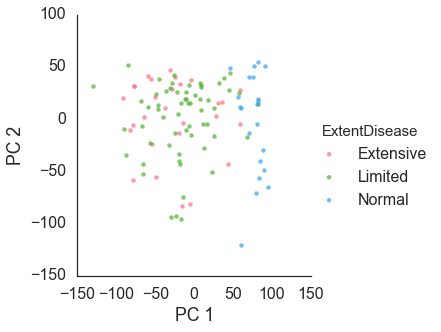

In [22]:
with sns.color_palette(sns.color_palette("hls", 2)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='ExtentDisease', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':0.7}
                  );

# Feature Selection

## LogisticRegression method

- ran this a couple times manually and got varying numbers of features retained
- I decided to 
    - run it 100 times
    - count how frequently each feature is retained
    - keep the top X number of them

In [23]:
RandomizedLogisticRegression

sklearn.linear_model.randomized_l1.RandomizedLogisticRegression

In [24]:
rlgrg = RandomizedLogisticRegression(C=1, scaling=0.5, 
                                      sample_fraction=0.70, n_resampling=500, 
                                      verbose=False, normalize=False, 
                                      random_state=None, n_jobs=1, )
# rlgrg.fit(X_, y_)
 



In [25]:
# select_k_best = SelectKBest(chi2, k=50)

In [26]:
# X_kbest = select_k_best.fit_transform(X, y_disease_encoded_any)

In [27]:
# select_k_best.scores_

In [28]:
# X.columns.values[select_k_best.get_support()]

In [29]:
t1 = time.time()

itr = 1
f_sel_db = feature_selection.consensus_top10pct_feature_selection(X=X, y=y_disease_encoded_any,
                                                      clf=rlgrg, names=None, iters=itr)

t2 = time.time()

In [30]:
seconds = t2-t1
print(seconds)

254.139344931


In [31]:
seconds/60

4.235655748844147

In [32]:
len(f_sel_db)

5470

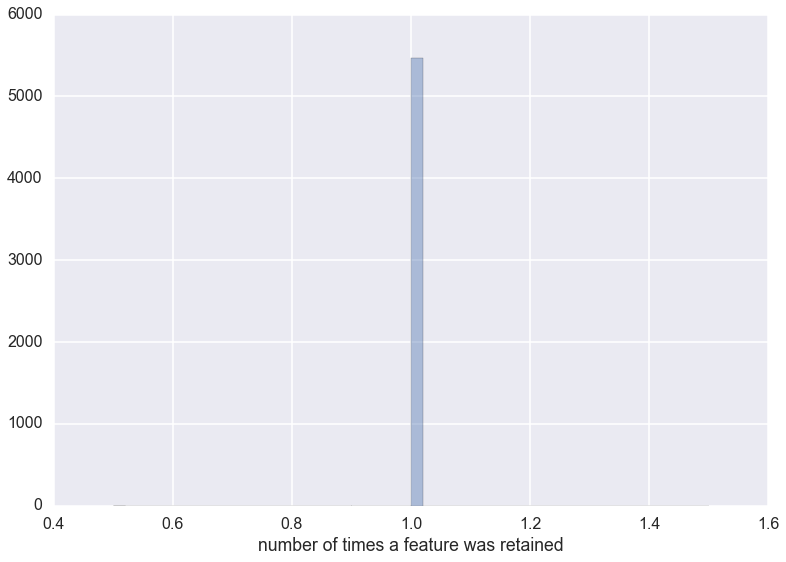

In [33]:
sns.distplot([len(l) for l in f_sel_db.values()], kde=False)
plt.xlabel('number of times a feature was retained');

### Look at the Features that were retained at least X times

In [34]:
my_features = feature_selection.process_retained_features(retained=f_sel_db, iters=itr)
my_features.head()

,avg_score,feature_names,retention_rate
0,0.002,_227610_PM_at,1
1,0.000,_37652_PM_at,1
2,0.000,_241923_PM_x_at,1
3,0.000,_241736_PM_at,1
4,0.004,_240856_PM_at,1


In [35]:
my_features.tail()

,avg_score,feature_names,retention_rate
5465,0.000,_41047_PM_at,1
5466,0.000,_241255_PM_at,1
5467,0.000,_241795_PM_at,1
5468,0.000,_243888_PM_at,1
5469,0.032,_238688_PM_at,1


In [36]:
my_features_ = my_features.sort_values(by='avg_score', axis=0, ascending=False).query("""retention_rate > 0.99""")
my_features_ = my_features_.query("""avg_score > 0.5 """)
my_features_.shape

(5, 3)

In [37]:
my_features_.head()

,avg_score,feature_names,retention_rate
515,0.892,_236351_PM_at,1
1143,0.802,_219795_PM_at,1
2733,0.786,_207529_PM_at,1
1724,0.658,_219727_PM_at,1
1549,0.574,_230784_PM_at,1


In [38]:
my_features_.tail()

,avg_score,feature_names,retention_rate
515,0.892,_236351_PM_at,1
1143,0.802,_219795_PM_at,1
2733,0.786,_207529_PM_at,1
1724,0.658,_219727_PM_at,1
1549,0.574,_230784_PM_at,1


In [39]:
X_best = X[my_features_.feature_names.values]
X_best.shape

(108, 5)

In [40]:
X_best

,_236351_PM_at,_219795_PM_at,_207529_PM_at,_219727_PM_at,_230784_PM_at
ID,,,,,
5500254131236090112251_101136.A02,4.532976,11.243378,11.376795,11.474473,10.162654
5500254131236090112251_101136.B08,6.259859,9.117716,9.777576,8.259775,11.487572
5500254131236090112251_101136.E05,4.306215,10.770249,12.068077,11.219646,9.861509
5500254131236090112251_101136.G12,4.156322,10.599896,12.395652,11.123872,10.533403
5500254131236090112252_101136.A08,4.319810,10.123012,8.535239,11.472549,10.356152
5500254131236090112252_101136.B01,4.431861,10.336847,9.537896,10.726516,10.828460
5500254131236090112252_101136.B06,4.295033,10.070607,10.943123,11.106394,11.150406
5500254131236090112252_101136.B12,4.271961,10.827306,11.653160,11.573142,9.587501
5500254131236090112252_101136.E08,4.455954,10.189449,11.123806,10.423208,11.044093


In [41]:
top_n_sorted_features = 4

if top_n_sorted_features > X_best.shape[1]:
    raise ValueError("X_best.shape[1] is smaller than value provided for top_n_sorted_features.")

pca = PCA(n_components=2, whiten=False)
# pca = RandomizedPCA(n_components=2, whiten=False)

pca_t = pca.fit_transform(X_best.iloc[:,:top_n_sorted_features],y_disease_encoded_any)
top_n_comp = 2
print('explained_variance_ratio_ of top {num}: {val}'.format(num=top_n_comp,val=pca.explained_variance_ratio_[:top_n_comp].sum()))

pca_t_l = pandas_helpers.repandasify(array=pca_t, y_names=disease_encoder_any.inverse_transform(y_disease_encoded_any), X_names=['PC {v_}'.format(v_=v+1) for v in range(len(pca_t[0]))])
# print(pca_t_l)

explained_variance_ratio_ of top 2: 0.945768240756


In [42]:
pca_t_l = pca_t_l.reset_index(drop=True)
pca_t_l['ExtentDisease'] = full_table['ExtentDisease']
pca_t_l['Disease_or_Normal'] = full_table['Disease_or_Normal']
# pca_t_l

In [43]:
plot_alpha = 0.7

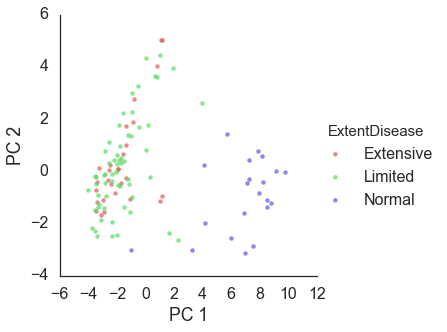

In [44]:
with sns.color_palette(sns.color_palette("hls", 3)):
    with sns.axes_style("white"):
        sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l.append(pca_t_l.iloc[9,:]), #sns.lmplot(x='PC 1', y='PC 2', data=pca_t_l,
                   hue='ExtentDisease', palette=None,
                   fit_reg=False,
                   scatter_kws={'alpha':plot_alpha}
                  );

In [45]:
top_10 = my_features_.iloc[:10,:]

# Test crossvalidation results and preditions on reduced data

In [46]:
X_reduced = X[top_10.feature_names.values.astype(str)]

In [47]:
top_10.feature_names.values.astype(str)

array(['_236351_PM_at', '_219795_PM_at', '_207529_PM_at', '_219727_PM_at',
       '_230784_PM_at'], 
      dtype='|S13')

In [48]:
X_reduced.head()

,_236351_PM_at,_219795_PM_at,_207529_PM_at,_219727_PM_at,_230784_PM_at
ID,,,,,
5500254131236090112251_101136.A02,4.532976,11.243378,11.376795,11.474473,10.162654
5500254131236090112251_101136.B08,6.259859,9.117716,9.777576,8.259775,11.487572
5500254131236090112251_101136.E05,4.306215,10.770249,12.068077,11.219646,9.861509
5500254131236090112251_101136.G12,4.156322,10.599896,12.395652,11.123872,10.533403
5500254131236090112252_101136.A08,4.319810,10.123012,8.535239,11.472549,10.356152


## split data into training and testing

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_disease_encoded_any,
                                                    test_size=0.33, random_state=42,
                                                    stratify=y_disease_encoded_any
                                                   )

# X_train, X_test, y_train, y_test = train_test_split(X, y_disease_encoded_spc,
#                                                     test_size=0.33, random_state=42,
#                                                     stratify=y_disease_encoded_spc
#                                                    )

In [50]:
y_train

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [51]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [52]:
y_disease_encoded_any

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Dummy Classifiers

In [53]:
dummy_strat = DummyClassifier(strategy='stratified')
dummy_freq = DummyClassifier(strategy='most_frequent')
dummy_unif = DummyClassifier(strategy='uniform')
# dummy_constant = DummyClassifier(strategy='constant', constant=1)

In [54]:
dummy_strat.fit(X_train, y_train)
dummy_freq.fit(X_train, y_train)
dummy_unif.fit(X_train, y_train)
# dummy_constant.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='uniform')

## dummy_strat

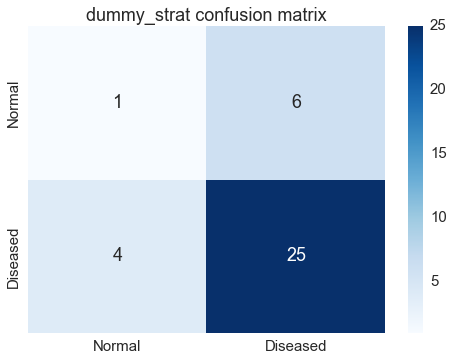

In [55]:
dummy_strat_cm = confusion_matrix(y_test,dummy_strat.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_strat_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_strat confusion matrix",
                 norm=False, context=None, annot=True);

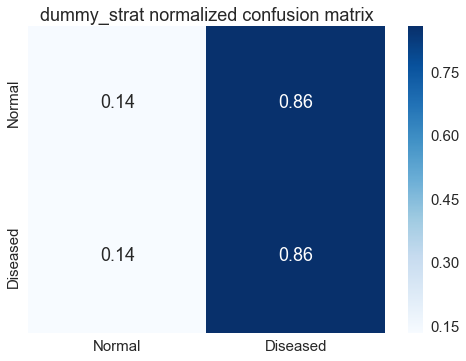

In [56]:
model_assessment.plot_confusion_matrix(cm=dummy_strat_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_strat normalized confusion matrix",
                 norm=True, context=None, annot=True);

## dummy_freq

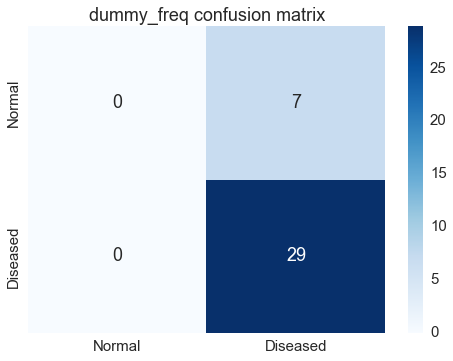

In [57]:
dummy_freq_cm = confusion_matrix(y_test,dummy_freq.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_freq_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_freq confusion matrix",
                 norm=False, context=None, annot=True);

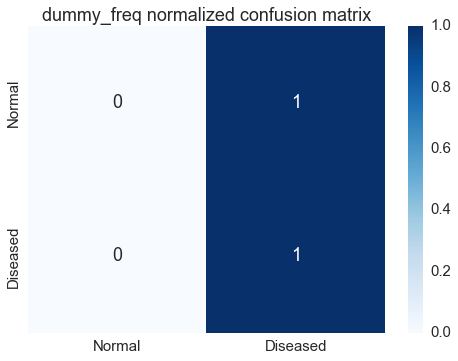

In [58]:
model_assessment.plot_confusion_matrix(cm=dummy_freq_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_freq normalized confusion matrix",
                 norm=True, context=None, annot=True);

## dummy_unif

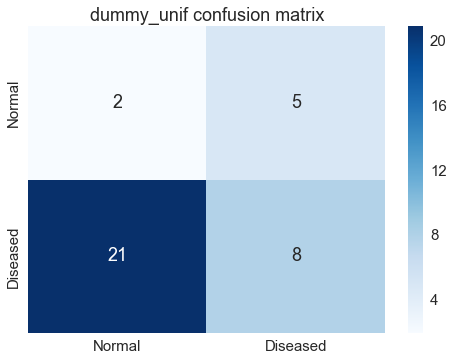

In [59]:
dummy_unif_cm = confusion_matrix(y_test,dummy_unif.predict(X_test))
model_assessment.plot_confusion_matrix(cm=dummy_unif_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_unif confusion matrix",
                 norm=False, context=None, annot=True);

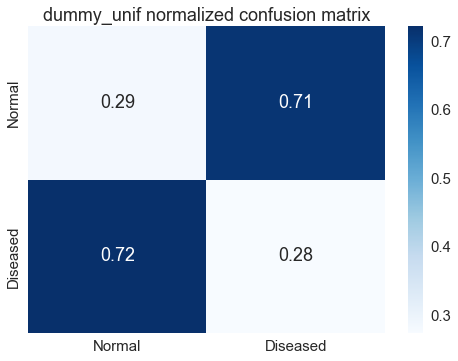

In [60]:
model_assessment.plot_confusion_matrix(cm=dummy_unif_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="dummy_unif normalized confusion matrix",
              norm=True, context=None, annot=True);

## SVM classifier

In [61]:
SVC

sklearn.svm.classes.SVC

In [62]:
svc_param_grid = {'svc__C': 10. ** np.arange(-3, 3),
                  'svc__gamma': 10. ** np.arange(-3, 3)
                 }



svc_pipe = make_pipeline(SVC(kernel='linear', random_state=42))

# run the gridsearch to tune the hyper-parameters
svc_grid = GridSearchCV(svc_pipe, param_grid=svc_param_grid, cv=10)

svc_grid.fit(X_train, y_train)
print(svc_grid.best_params_)


# generate and plot confusion matrices
svc_cm = confusion_matrix(y_test,svc_grid.predict(X_test))



{'svc__gamma': 0.001, 'svc__C': 0.01}


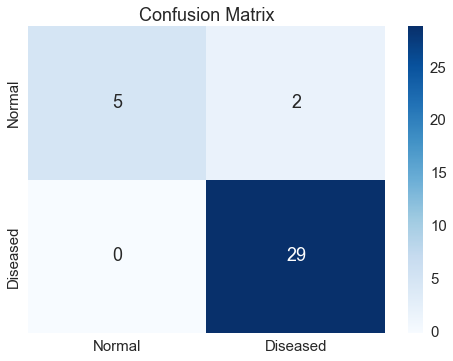

In [63]:
# Non-normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);


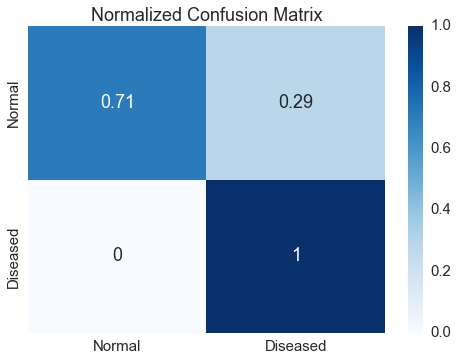

In [64]:
# Normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## RandomForest classifier

In [65]:
rfst_param_grid = {'randomforestclassifier__n_estimators': np.arange(1,15,),
                   'randomforestclassifier__min_samples_leaf': np.arange(1,10,2)
                  }



rfst_pipe = make_pipeline(RandomForestClassifier(random_state=42,n_jobs=8))

# run the gridsearch to tune the hyper-parameters
rfst_grid = GridSearchCV(rfst_pipe, param_grid=rfst_param_grid, cv=3)


rfst_grid.fit(X_train, y_train)
print(rfst_grid.best_params_)


# generate and plot confusion matrices
rfst_cm = confusion_matrix(y_test,rfst_grid.predict(X_test))

{'randomforestclassifier__min_samples_leaf': 7, 'randomforestclassifier__n_estimators': 11}


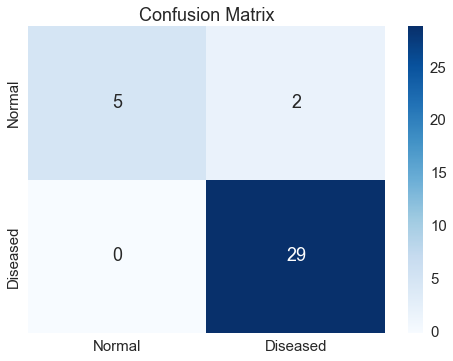

In [66]:
# Non-normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=False, context=None, annot=True);

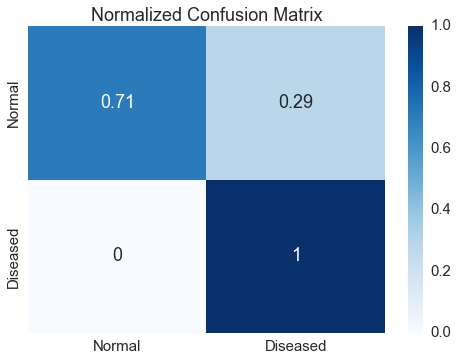

In [67]:
# Normalized
model_assessment.plot_confusion_matrix(cm=svc_cm, labels=disease_encoder_any.classes_, cmap='Blues', title=None,
                 norm=True, context=None, annot=True);

## LogisticRegression classifier

In [68]:
log_reg_param_grid = {'logisticregression__penalty': ['l1','l2'],
                     }



log_reg_pipe = make_pipeline(LogisticRegression(random_state=42,n_jobs=8))

# run the gridsearch to tune the hyper-parameters
log_reg_grid = GridSearchCV(log_reg_pipe, param_grid=log_reg_param_grid, cv=5)


log_reg_grid.fit(X_train, y_train)
print(log_reg_grid.best_params_)


# generate and plot confusion matrices
log_reg_cm = confusion_matrix(y_test,log_reg_grid.predict(X_test))

{'logisticregression__penalty': 'l1'}


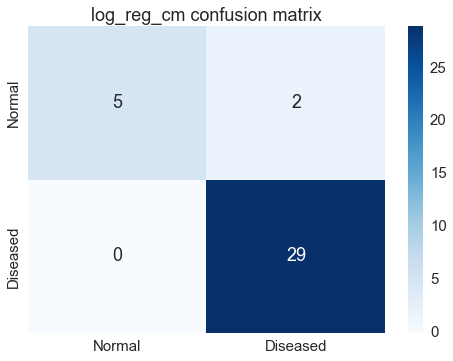

In [69]:
model_assessment.plot_confusion_matrix(cm=log_reg_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="log_reg_cm confusion matrix",
              norm=False, context=None, annot=True);

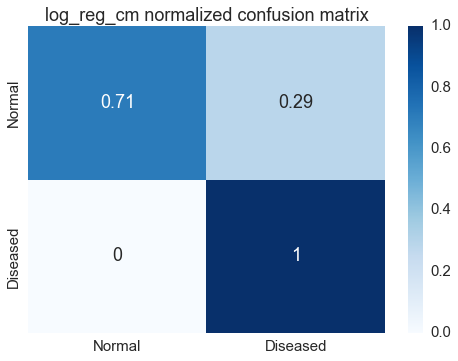

In [70]:
model_assessment.plot_confusion_matrix(cm=log_reg_cm, labels=disease_encoder_any.classes_, cmap='Blues', title="log_reg_cm normalized confusion matrix",
              norm=True, context=None, annot=True);

# What genes/probes did we recover?

In [71]:
mapping_table_file = pd.read_excel('/home/gus/MEGAsync/zim/main/BCH/Projects/Jodie_and_James/comparison_gus_v2.xls')
mapping_table = mapping_table_file[['probes','GENE_SYMBOL']]

In [72]:
mapping_table.head()

,probes,GENE_SYMBOL
0,1552281_PM_at,SLC39A5
1,1552296_PM_at,BEST4
2,1552365_PM_at,SCIN
3,1552367_PM_a_at,SCIN
4,1552497_PM_a_at,SLAMF6


In [73]:
my_probes = [x[1:] for x in X_reduced.columns.values]

In [74]:
mapping_table[mapping_table.probes.apply(lambda x: x in my_probes)]

,probes,GENE_SYMBOL
691,207529_PM_at,DEFA5
1336,219727_PM_at,DUOX2
1340,219795_PM_at,SLC6A14
1866,230784_PM_at,PRAC
2056,236351_PM_at,LOC389023
